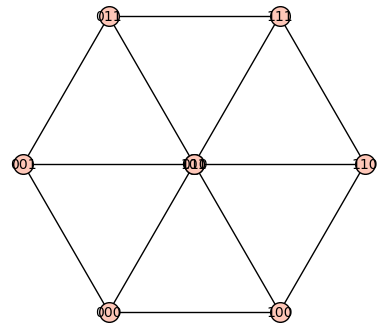

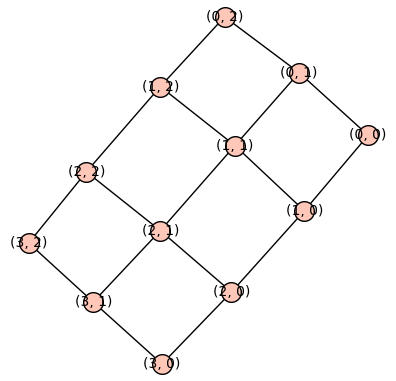

[('000', '000'), ('000', '001'), ('000', '010'), ('000', '011'), ('000', '100'), ('000', '101'), ('000', '110'), ('000', '111'), ('001', '001'), ('001', '010'), ('001', '011'), ('001', '100'), ('001', '101'), ('001', '110'), ('001', '111'), ('010', '010'), ('010', '011'), ('010', '100'), ('010', '101'), ('010', '110'), ('010', '111'), ('011', '011'), ('011', '100'), ('011', '101'), ('011', '110'), ('011', '111'), ('100', '100'), ('100', '101'), ('100', '110'), ('100', '111'), ('101', '101'), ('101', '110'), ('101', '111'), ('110', '110'), ('110', '111'), ('111', '111')]
[('000', '000'), ('000', '001'), ('000', '010'), ('000', '011'), ('000', '100'), ('000', '101'), ('000', '110'), ('000', '111'), ('001', '001'), ('001', '010'), ('001', '011'), ('001', '100'), ('001', '101'), ('001', '110'), ('001', '111'), ('010', '010'), ('010', '011'), ('010', '100'), ('010', '101'), ('010', '110'), ('010', '111'), ('011', '011'), ('011', '100'), ('011', '101'), ('011', '110'), ('011', '111'), ('100'

In [13]:
#tukaj je g nek nakljucen graf
P4 = graphs.PathGraph(2)
P3 = graphs.PathGraph(2)
P = P3.cartesian_product(P4)
g = graphs.CubeGraph(3)
show(g)

P4 = graphs.PathGraph(3)
P3 = graphs.PathGraph(4)
P = P3.cartesian_product(P4)
P.show()

#n= g.order()
#X=Set(g.vertices(sort=True))

def mnozica_parov(graf):
    X=graf.vertices(sort=True)
    a=[]
    for i in X:
        for j in X:
            if j>=i:
                a.append((i,j))
            else:
                continue
    return(a)

print(mnozica_parov(g))
print(mnozica_parov(P))


#naj bi bil linearni program, kjer iscemo maksimum, y pa je spremenljivka
def linearni_program(graf, mnozica_parov):
    vozlisca=graf.vertices(sort=True)
    matrika=[]
    #matrika za a(p,v)
    for v in vozlisca:
        a={"vozlisce":v}
        for par in mnozica_parov:
            if graf.distance(par[0],v)==graf.distance(par[1],v):
                a[par]=0
            else:
                a[par]=1
        matrika.append(a)
    #print(matrika)
    #print(matrika[1])

    p = MixedIntegerLinearProgram(maximization = True)
    y = p.new_variable(binary = True)
    

    #ta funkcija katere maksimum iscemo
    p.set_objective( sum([y[p] for p in mnozica_parov]))
    i=0
    
    #dodajamo pogo za vsako vozlisce grafa posebaj
    for v in graf.vertices():
        vektor=matrika[i]
        del vektor['vozlisce']
        #print(vektor)
        p.add_constraint(sum(vektor[p]*y[p] for p in mnozica_parov) <= 1)
        i=i+1
    vrednost=p.solve()
    #b = p.get_values(y)
    return(vrednost)

#m=linearni_program(P,mnozica_parov)
#print(m)
